<a href="https://colab.research.google.com/github/ashwingeeni12/data_science_fundamentals/blob/main/Unit_6/Ashwin_Geeni_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt


!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-mydlha1p
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-mydlha1p
  Resolved https://github.com/pydata/xarray.git to commit 2c8b6e6942e537b24cc09adc5204d6100d2843aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**Task1**:

Does elpd_loo mean anything if we only have one model?

**Answer1**:

No it doesn't mean anything if you don't have something to compare it to. If you do then the higher the value/more positive value is better.

**Task2**:

Describe overfitting, in the context of this course

**Answer2**:

Overfitting is where a model focuses too much on the observed data, including unimportant details. This makes it hard for the model to give accurate predictions on new data.

**Task3**:

How do we mitigate overfitting?

**Answer3**:

To reduce/prevent overfitting, you can use weak/regularizing priors and less variables in your model. Regularizing priors reduces the impact of unnecessary details in the data. Using fewer variables prevents the model from noticing random patterns in the data that don't matter. Also causal diagrams can help address overfitting.

**Task4**:

How do we mitigate underfitting?

**Answer4**:

To reduce underfitting, you can use elpd_loo to compare models and choose the one with the highest value. Also, causal diagrams can also help address underfitting.


**Task5**:

Why would we want more than one predictor in a model?

**Answer5**:

Having more than one predictor in a model is good when it makes sense logically. Like when multiple variables influence the dependent variable. Adding good predictors can increase the elpd_loo, improving the model.

**Task6**:

Can we have too many predictors? How would we now?

**Answer6**:

Having too many predictors can cause overfitting. You can identify overfitting by testing the model on data outside the observed and if it does a bad job then overfitting might be the issue.

**Task7**:

What is variable selection, and how does it work?

**Answer7**:

Variable selection is chosing most useful predictors for a model.

Variable selection works by building different models with combinations of predictors/variables and comparing their elpd_loo values to find the best one.

Causal diagrams are also helpful, as they provide an way to visualize relationships between predictors, helping find the most relevant ones.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

**Answer8**:

In a linear regression with two predictors adding both variables to the model in the standard way results in a model with a single shared slope/global slope, but with varying intercepts.

Using the categorical variable hierarchically with the quantitative variable changes the model. Instead of a single global slope, each category gets its own slope and intercept. These models slopes vary around the global slope so there is some interaction between the slopes. The intercepts also vary across groups.

If the interaction between the categorical and quantitative variables is added to the model, it produces the greatest freedom. Each category has its own slope and intercept, with the slopes being as distinct as possible within the constraints of the model. There is no global slope in these slopes, and the slopes remain partially influenced by each other.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

**Answer9**:

We can visualize multiple linear regression models by creating multiple plots or using a 3D space. However, it's not possible to visualize the entire model with three or more predictors at once, as our visualization is limited to 3D—allowing us to see at most two predictors and one response variable simultaneously. For models where its a lot simpler we can use 2d plots with one predictor on the x-axis and the result on the y-axis.

Causal diagrams are another way to visualize multiple linear regression models. While they are simpler and easier to understand, they lack the detailed information.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

position is a categorical predictor and free throw percentage and position predictors

In [8]:
model_bb = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
idata_bb = model_bb.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

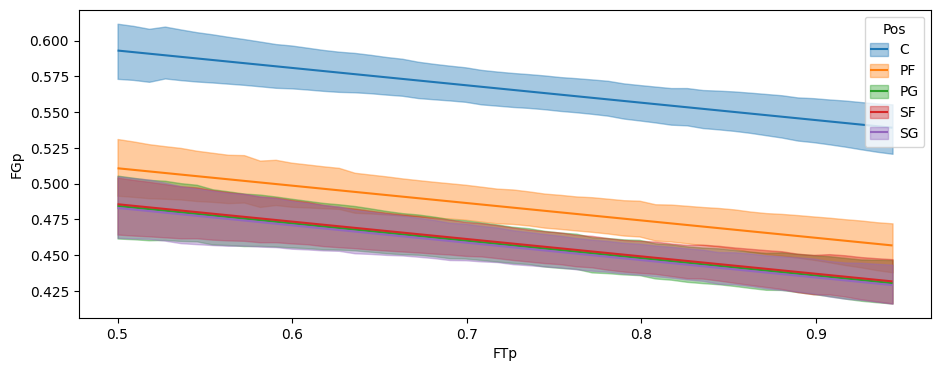

In [9]:
bmb.interpret.plot_predictions(model_bb, idata_bb, ["FTp",  "Pos"], fig_kwargs={"figsize":(11, 4)})

position is a hierarchy and free throw percentage and position predictors



In [10]:
model_bbh = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
idata_bbh = model_bbh.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 24 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

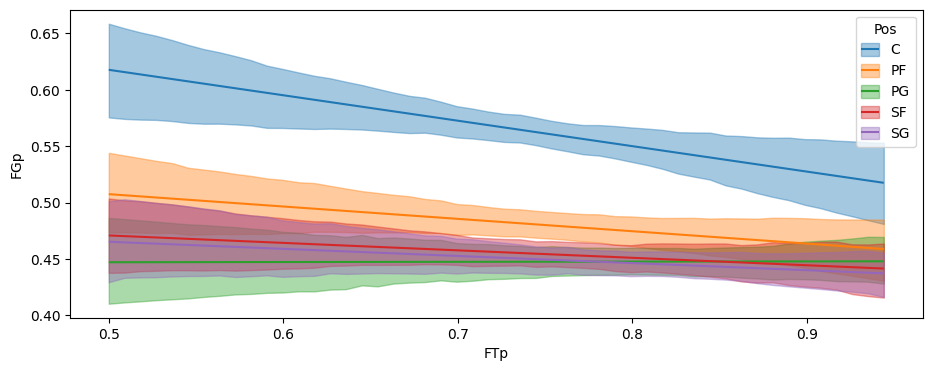

In [11]:
bmb.interpret.plot_predictions(model_bbh, idata_bbh, ["FTp","Pos"], fig_kwargs={"figsize":(11, 4)})

position with free throw percentage interaction free throw percentage and position predictors

In [13]:
model_bb_pftp = bmb.Model("`FGp` ~ `FTp` + `Pos` + `FTp`:`Pos`", data=bb)
idata_bb_pftp = model_bb_pftp.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

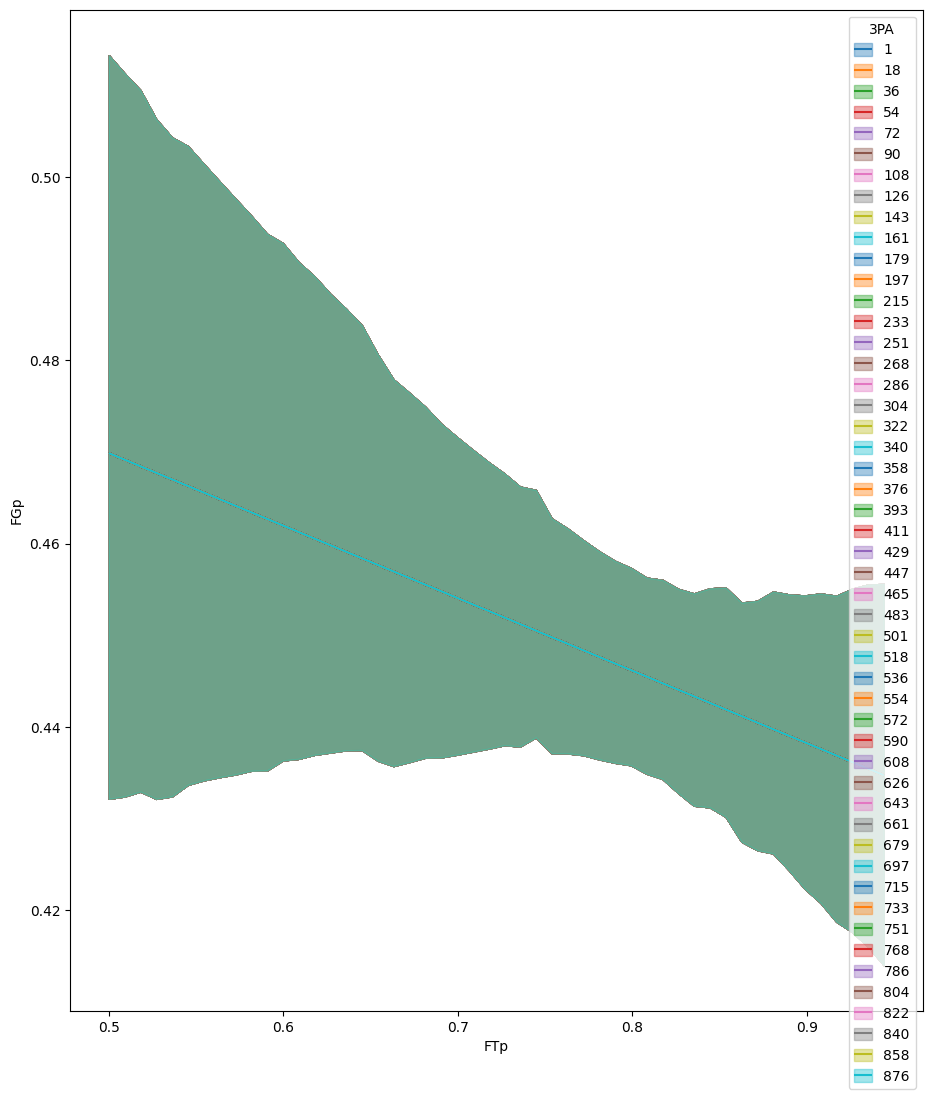

In [14]:
bmb.interpret.plot_predictions(model_bb_pftp, idata_bb_pftp, ["FTp","3PA"], fig_kwargs={"figsize":(11, 13)})

3pt attempts and postion interact free throw percentage, position, and 3pt attempts predictors

In [15]:
model_bb_3ptp = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `3PA` : `Pos`", data=bb)
idata_bb_3ptp = model_bb_3ptp.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

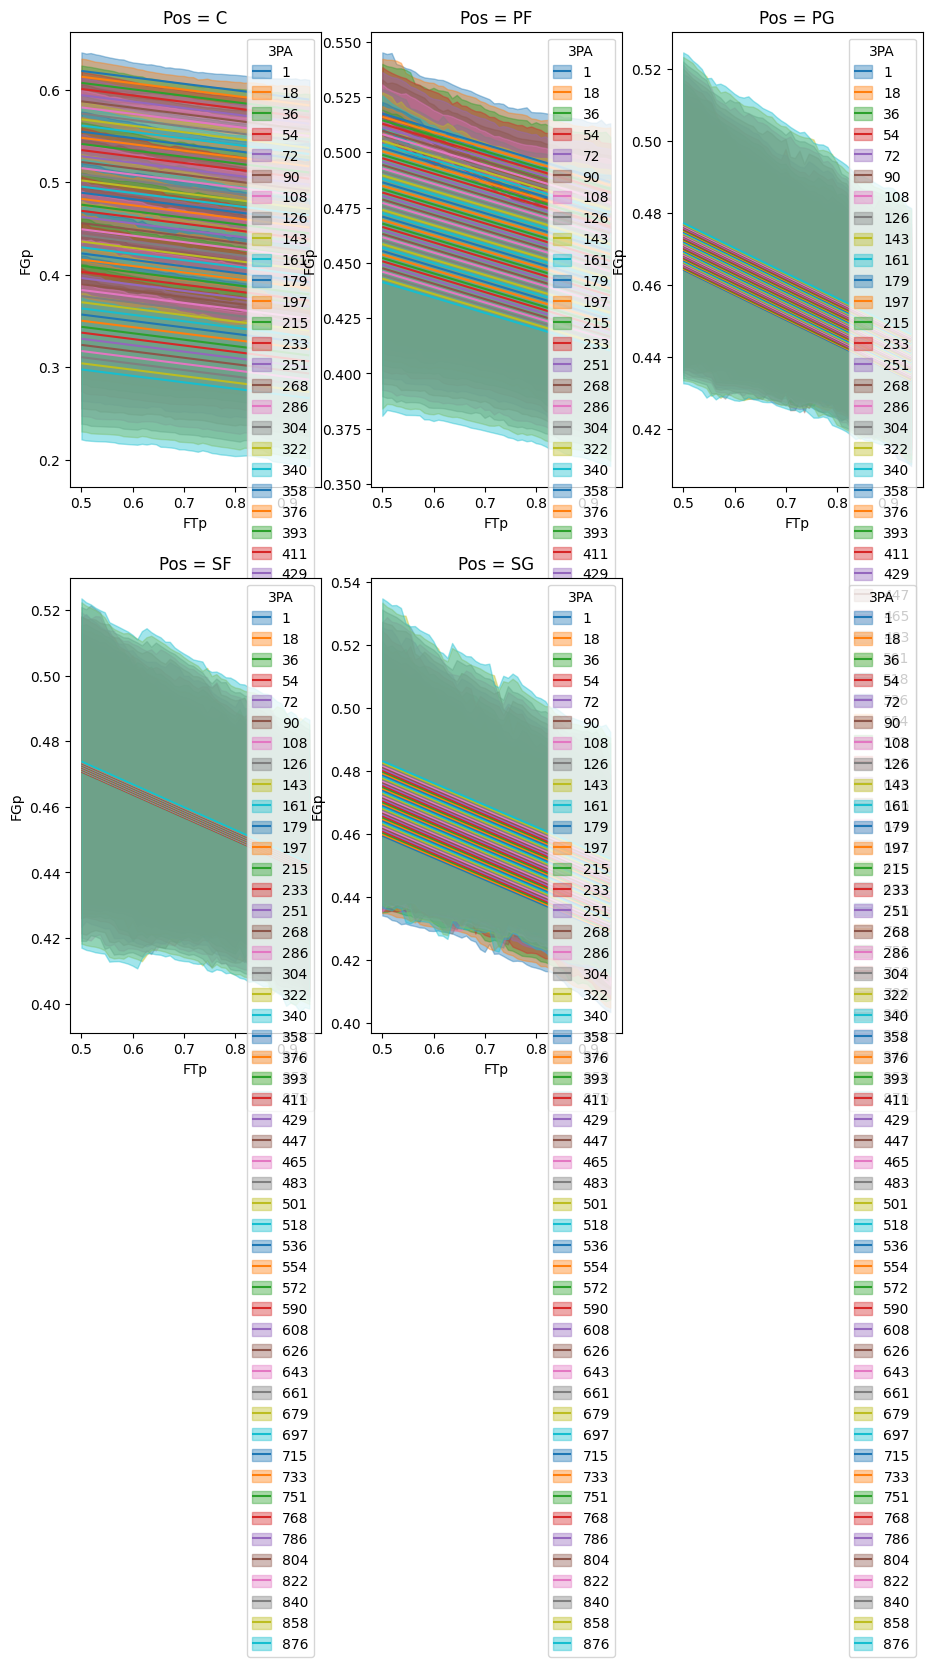

In [16]:
bmb.interpret.plot_predictions(model_bb_3ptp, idata_bb_3ptp, ["FTp","3PA","Pos"], fig_kwargs={"figsize":(11, 13)})

all interact position, free throw percentage, and 3pt attempts predictors

In [17]:
model_bb_all = bmb.Model("`FGp` ~ `FTp` + `3PA` + `Pos` + `FTp`:`3PA` + `FTp`:`Pos` + `3PA` : `Pos`", data=bb)
idata_bb_all = model_bb_all.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x1300 with 6 Axes>,
 array([[<Axes: title={'center': 'Pos = C'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = PG'}, xlabel='FTp', ylabel='FGp'>],
        [<Axes: title={'center': 'Pos = SF'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: title={'center': 'Pos = SG'}, xlabel='FTp', ylabel='FGp'>,
         <Axes: xlabel='FTp', ylabel='FGp'>]], dtype=object))

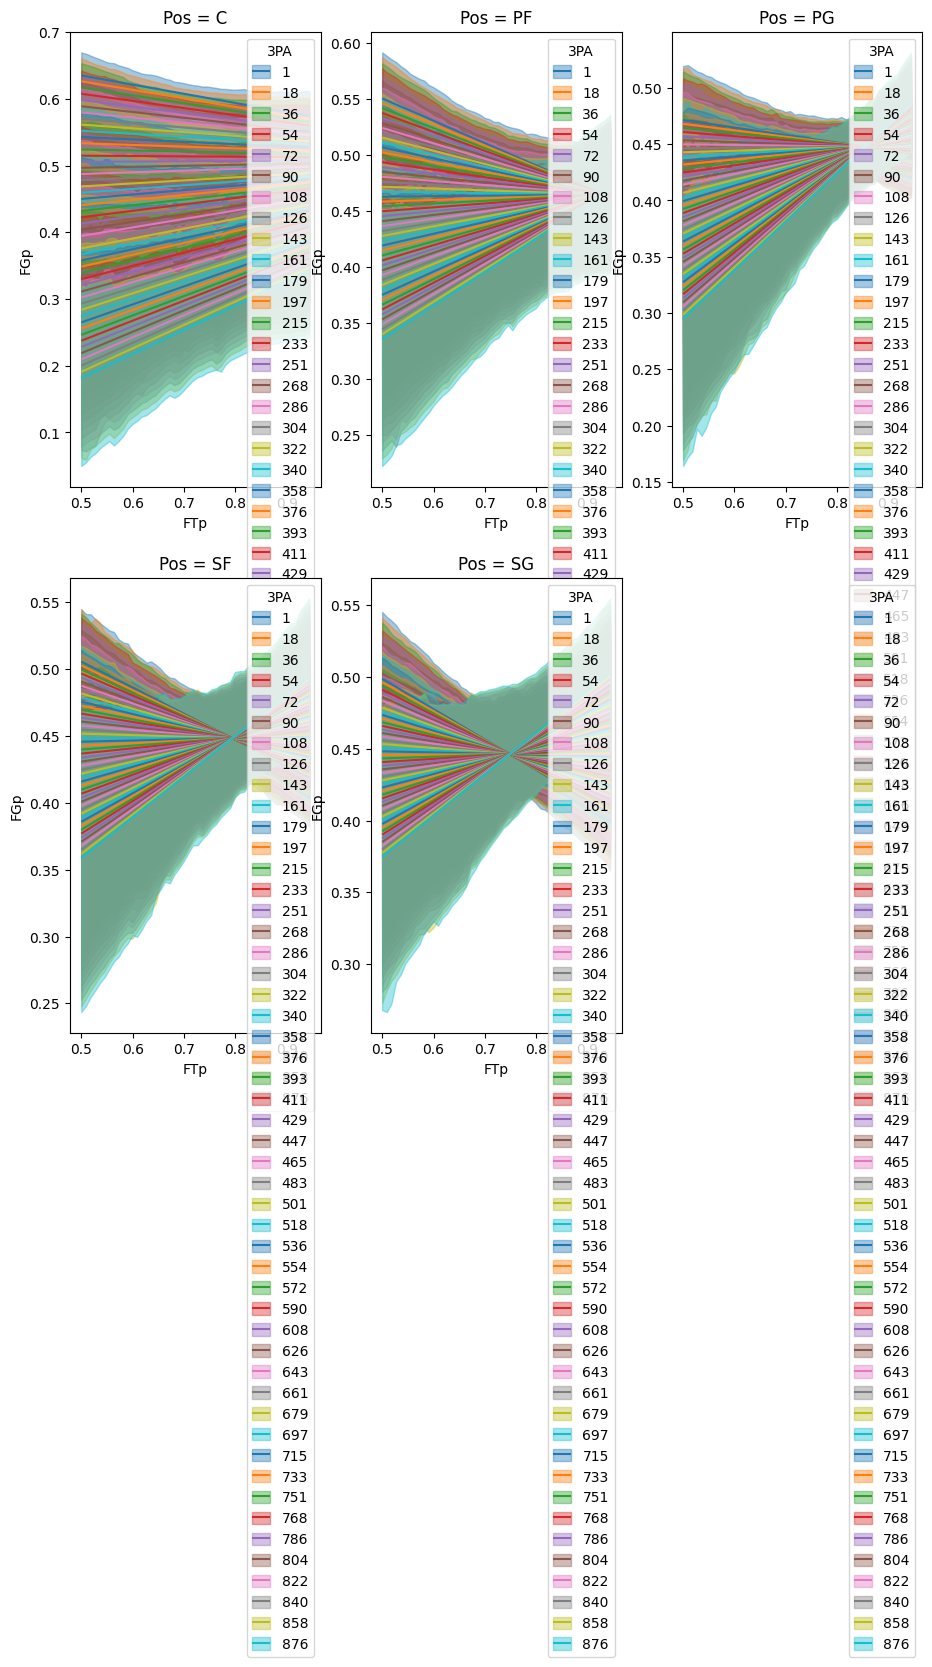

In [19]:
bmb.interpret.plot_predictions(model_bb_all, idata_bb_all, ["FTp","3PA","Pos"], fig_kwargs={"figsize":(11, 13)})#,#legend=false)

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

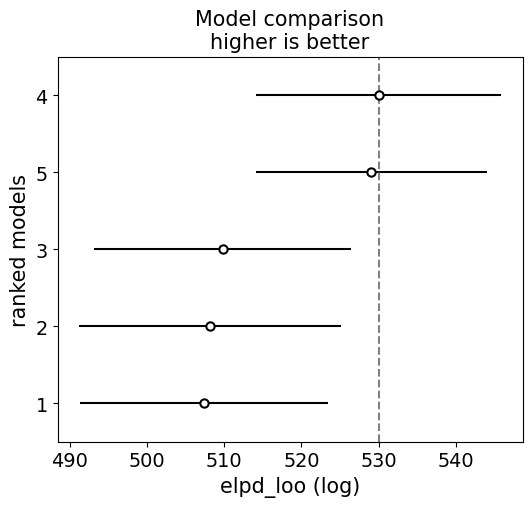

In [21]:
comp = az.compare({"1":idata_bb,"2":idata_bbh, "3":idata_bb_pftp, "4":idata_bb_3ptp, "5": idata_bb_all})
az.plot_compare(comp)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

**Answer11**:

The model with the 3PA and Position interaction is the best according to elpd_loo. This is followed by the model with all predictor interactions. These two models perform better because 3-point attempts and position are related, while other interactions are less relevant, making them less effective.